<a href="https://colab.research.google.com/github/oscarserc/TESIS/blob/main/PASO_3c___U_Net____grid28x28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UTILIZACIÓN DE TÉCNICAS DE APRENDIZAJE AUTOMÁTICO PARA LA DETECCIÓN DE LOS NODOS CONFLICTIVOS EN UNA RED SOCIAL**.

La base de datos que emplearemos puede llegar a unas 12.000 observaciones. El tamaño crece rápidamente. Por ejemplo 4000 observaciones son aproximadamente 50 MB.

· Pruebas iniciales con: 4.000 observaciones

· Para ello generamos una 100 **simulaciones**, y guardamos unos 40 **frames** de cada una de ellas

· Además como **target** guardamos la matriz con la IDENTIDAD de todos y cada uno de los AGENTES.




#**PRUEBA 3**: Utilizaremos una <font color='green'>**Arquitectura de RED NEURONAL U-Net**</font>. Planteamos el problema de localizar a los agentes influyentes como un problema de **Segmentación** de imágenes.

La estructura que hemos probado de partida está basada en el modelo U-Net <font color='blue'> [Ronneberger, O., Fischer, P., & Brox, T. (2015)]</font>, y podemos observarla a continuación.


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/U_Net_2b.png?raw=true' width="950"/>
<figcaption></figcaption></center>
</figure>



<b>Ref.:</b>

Ronneberger, O., Fischer, P., & Brox, T. (2015, October)  <i>U-Net: Convolutional Networks for Biomedical
Image Segmentation </i>
https://arxiv.org/pdf/1505.04597v1.pdf


<br></br>


El archivo de prueba contiene 4000 simulaciones de una población de AGENTES EMOCIONALES y ACOSADORES, por lo que nos enfrentamos ante un problema de clasificación binaria de los nodos de la red. Lo resolvemos segmentando la imagen, generando una salida de la arquitectura neuronal como refleja la imagen superior.


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Matriz_BD_1b.png?raw=true' width="950"/>
<figcaption></figcaption></center>
</figure>



In [ ]:

#!pip install wget


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=34ae9b7ed2e2d7c4ff9a110c4ad41a3265116fe23aa91e62db75b49939f18283
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Comenzamos el procesamiento de los datos con la lectura del archivo.

In [ ]:

#import wget

# Si usamos el REPOSITORIO para el almacenamiento de datos, creo que hay restricciones de espacio
# si es muy grande el archivo no se puede

# Subimos a los servidores de GOOGLE COOLAB la base de datos de PRUEBA (Acceso en el repositorio: View raw)
# --------------------------------------------------------------------
#url_simulaciones = 'https://raw.githubusercontent.com/oscarserc/BASE_de_DATOS/main/bd_combinado.csv'
#wget.download(url_simulaciones)


'bd_combinado.csv'

Convertimos en un DATAFRAME y permutamos las filas.

In [ ]:

#import pandas as pd

# Cargamos los datos
# ------------------
#bd_simulaciones = pd.read_csv('bd_combinado.csv')

# Aleatorizamos
# -------------
#bd_simulaciones = bd_simulaciones.sample(frac=1).reset_index(drop=True)



Base de datos con simulaciones en un grid de <font color="green"><b>28x28</b></font> (15% de agentes mutantes traidores).

In [ ]:

import pandas as pd

# CARGAMOS LA BASE DE DATOS SIN PERMUTAR LAS FILAS (grid de 28x28, y población 85-15 emocionales/mutantes)
# ------------------------------------------------
bd_simulaciones = pd.read_csv('bd_100simulaciones_28x28_emo85_vs_15.csv')

# Aleatorizamos
# -------------
#bd_simulaciones = bd_simulaciones.sample(frac=1).reset_index(drop=True)


In [ ]:

bd_simulaciones


,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b777,b778,b779,b780,b781,b782,b783,Simulacion_ID,Frame,Target
0,0.666667,0.701176,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,1.000000,1.000000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,1.000000,1.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,0.666667,0.701176,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,1.000000,1.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.333333,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,36,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3996,0.333333,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,37,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3997,0.333333,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,38,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3998,0.333333,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,39,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


<b><font color='red'>ACTUALIZACIÓN: </font></b>Base de datos con simulaciones en un grid de <b>28x28</b> (15% de agentes mutantes traidores).

In [ ]:

import pandas as pd

# Cargamos los datos
# ------------------
# Inicialmente hacía un MIX de pobación emo85/traidores15. Un poco en plan como
# cuando se balancean clases, pero no es un problema de clasificación. En la realidad
# no habrá poblaciones puras.
# Antes hacía:
#          1) Archivo con 100 simulaciones: emo85/traidores15 (4000 filas)
#          2) Archivo con 100 simulaciones: emo100 (4000 filas)
#          3) COMBINAR ambos archivos y aleatorizar
#             salía un archivo final de: 8000 filas
#
# Parece que obedece mejor a la realidad aleatorizar en la generación de agentes,
# y no generar un lote puro y combinarlo. Haríamos sólo el primer paso:
#
#            x ~ Binomial(numero_agentes, prob_mutar=0.15)
#
# Haré, por tanto, un primer intento: 100 SIMULACIONES, 4000 PASOS, 40 FRAMES
bd_simulaciones = pd.read_csv('bd_100simulaciones_28x28_emo85_vs_15.csv')

# Aleatorizamos
# -------------
bd_simulaciones = bd_simulaciones.sample(frac=1).reset_index(drop=True)


#Variables explicativas: **X**

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
                                                                                       # 20 de Septiembre de 2025
                                                                                       # Actualizo: AHORA SERÁN frames de 28 x 28
size       = 28  # <-------------------------------------------------------------------- CUIDADO, VOY A CAMBIAR EL SIZE A '28'
num_frames = 40
df         = bd_simulaciones.copy()

lista_frames = []
X            = []

nombre_columnas_ROJO  = ['r' + str(indice) for indice in range(size*size)]
nombre_columnas_VERDE = ['g' + str(indice) for indice in range(size*size)]
nombre_columnas_AZUL  = ['b' + str(indice) for indice in range(size*size)]


for fila in range(len(bd_simulaciones)):
  canal_r = pd.array(df[nombre_columnas_ROJO].iloc[fila]).reshape(size,size)
  canal_v = pd.array(df[nombre_columnas_VERDE].iloc[fila]).reshape(size,size)
  canal_a = pd.array(df[nombre_columnas_AZUL].iloc[fila]).reshape(size,size)

  # CUIDADO que np.dstack apila los tres valores de cada pixel
  # ----------------------------------------------------------
  frame = np.array([canal_r, canal_v, canal_a])

  lista_frames.append(frame)

X = np.array(lista_frames)
X.shape



(4000, 3, 28, 28)

#Target: **Y**.

In [ ]:

lista_targets = []

for fila in range(len(bd_simulaciones)):
  lista_id_agentes = bd_simulaciones.iloc[fila]['Target'].replace('[','').replace(']','')
  target = [int(caracter) for caracter in lista_id_agentes.split(',')]
  target = np.array(target)
  target = target.reshape(size,size)

  # Con los paréntesis  '['  ']' sale de dimensión: (8000, 1, 10, 10)   # <-------------------------- Aquí ajusto la DIMENSIÓN
  #lista_targets.append([target])
  # Si queremos de dimensión: (8000, 10, 10)
  lista_targets.append(target)

Y = np.array(lista_targets)
Y.shape



(4000, 28, 28)

#**CONVERSIÓN EN TENSORES DE PyTorch**.

In [ ]:

import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = X
Y_train = Y

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    # self.X = torch.tensor(X).float()
    self.X = torch.tensor(X).float()
    self.Y = torch.tensor(Y).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]


# SELECCIONANDO GRUPOS DE OBSERVACIONES PARA VALIDACIÓN
# -----------------------------------------------------

from sklearn.model_selection import train_test_split

X_subset, X_val, Y_subset, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)

dataset = {
    'train' : Dataset_frames(X_subset, Y_subset),
    'val'   : Dataset_frames(X_val, Y_val)
}

dataloader = {
    'train' : torch.utils.data.DataLoader(dataset['train'], batch_size=30,   shuffle=False),
    'val'   : torch.utils.data.DataLoader(dataset['val'],   batch_size=30, shuffle=False)
}


In [ ]:
frames, mascara = next(iter(dataloader['train']))
frames.shape, mascara.shape

(torch.Size([30, 3, 28, 28]), torch.Size([30, 28, 28]))

#**Modelo U-net** (Para la discriminación de 2 clases).

In [ ]:

import torch
import torch.nn.functional as F

# --------------------------------------
# Construimos dos funciones para generar
# módulos para la Red
# --------------------------------------
def conv3x3_bn(canales_in, canales_out):
  return torch.nn.Sequential(
      torch.nn.Conv2d(canales_in, canales_out, 3, padding=1),
      torch.nn.BatchNorm2d(canales_out),
      torch.nn.ReLU(inplace=True)
  )

def encoder_conv(canales_in, canales_out):
  return torch.nn.Sequential(
      torch.nn.MaxPool2d(2),
      conv3x3_bn(canales_in, canales_out),
      conv3x3_bn(canales_out, canales_out)
  )
# ---------------------------------------



# --------------
#  CLASE DECONV
# --------------
class deconv(torch.nn.Module):
  def __init__(self, canales_in, canales_out):
    super(deconv, self).__init__()
    self.upsample = torch.nn.ConvTranspose2d(canales_in, canales_out, 2, stride=2)
    self.conv1    = conv3x3_bn(canales_in, canales_out)
    self.conv2    = conv3x3_bn(canales_out, canales_out)

  # Ahora tenemos que integrar:
  #  · Salida de la capa previa
  #  · Salida del encoder
  def forward(self, x1, x2):
    x1 = self.upsample(x1)
    diffX = x2.size()[2] - x1.size()[2]
    diffY = x2.size()[3] - x1.size()[3]
    x1 = F.pad(x1, (diffX, 0, diffY, 0))
    # Concatenamos los tensores
    x = torch.cat([x2, x1], dim=1)
    x = self.conv1(x)
    x = self.conv2(x)
    return x


# ============
#  CLASE Unet
# ============
class UNet(torch.nn.Module):
  def __init__(self, n_classes=2, in_ch=3):        # <------------------------------------------------------------------- 2 clases y CREO QUE HAY QUE PONER 3 in
    super().__init__()

    # FILTROS en cada una de las CAPAS que se van a generar
    filtros = [16, 32, 64, 128]

    # PRIMERA CAPA conv
    self.conv1 = torch.nn.Sequential(
        conv3x3_bn(in_ch, filtros[0]),
        conv3x3_bn(filtros[0], filtros[0])
    )

    # Capas del ENCODER
    self.conv2 = encoder_conv(filtros[0], filtros[1])
    self.conv3 = encoder_conv(filtros[1], filtros[2])
    self.conv4 = encoder_conv(filtros[2], filtros[3])

    # Capas del DECODER
    self.deconv1 = deconv(filtros[3], filtros[2])
    self.deconv2 = deconv(filtros[2], filtros[1])
    self.deconv3 = deconv(filtros[1], filtros[0])

    # ULTIMA CAPA CONV --> Nos da la MÁSCARA
    self.out = torch.nn.Conv2d(filtros[0], n_classes, 3, padding=1)

  def forward(self, x):
    # ENCODER
    x1 = self.conv1(x)
    x2 = self.conv2(x1)
    x3 = self.conv3(x2)
    x  = self.conv4(x3)

    # DECODER
    x = self.deconv1(x, x3)
    x = self.deconv2(x, x2)
    x = self.deconv3(x, x1)
    x = self.out(x)
    return x



In [ ]:

modelo_UNet = UNet()
salida = modelo_UNet(torch.randn((10, 3, 394, 394)))
salida.shape


torch.Size([10, 2, 394, 394])

#**MÉTODO para el ENTRENAMIENTO**.

In [ ]:

from sklearn.metrics import accuracy_score

# Función auxiliar
# ----------------

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)



# DEFINIMOS LA FUNCIÓN DE ENTRENAMIENTO
# =====================================

def fit(model, dataloader, epochs=10, log_each=1):
   criterion = torch.nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

   l, acc         = [], []
   val_l, val_acc = [], []

   for e in range(1, epochs+1):
      _l, _acc = [], []
      model.train()  # <------------------------------------------ MODO de ENTRENAMIENTO
      for x_b, y_b in dataloader['train']:
        y_pred = model(x_b)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_probas = torch.argmax(softmax(y_pred), axis=1)
        # Los SCORES de SKLEARN no aceptan matrices, así que hay que convertirlas en dimensión 1D (usar flatten())
        _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.detach().numpy().flatten()))

      l.append(np.mean(_l))
      acc.append(np.mean(_acc))
      if not e % log_each:
        print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")


      model.eval()  # <------------------------------------------- MODO de EVALUACIÓN
      _l, _acc = [], []
      with torch.no_grad():
        for x_b, y_b in dataloader['val']:
          y_pred = model(x_b)
          loss   = criterion(y_pred, y_b)
          _l.append(loss.item())
          y_probas = torch.argmax(softmax(y_pred), axis=1)
          _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.numpy().flatten()))
      val_l.append(np.mean(_l))
      val_acc.append(np.mean(_acc))

   return {'epoch':list(range(1,epochs+1)), 'loss':l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}



#**ENTRENAMIENTO DEL MODELO**.

In [ ]:

# INSTANCIAMOS EL MODELO
# ======================

# Imprimimos junto al número de Epoch, el valor de la función de pérdida y la accuracy (Supera el 98%)
model  = UNet()
hist   = fit(model, dataloader, 20)


Epoch 1/20 loss 0.02929 acc 0.96835
Epoch 2/20 loss 0.00183 acc 0.99299
Epoch 3/20 loss 0.00097 acc 0.99386
Epoch 4/20 loss 0.00065 acc 0.99418
Epoch 5/20 loss 0.00048 acc 0.99432
Epoch 6/20 loss 0.00037 acc 0.99441
Epoch 7/20 loss 0.00030 acc 0.99448
Epoch 8/20 loss 0.00025 acc 0.99452
Epoch 9/20 loss 0.00021 acc 0.99452
Epoch 10/20 loss 0.00018 acc 0.99453
Epoch 11/20 loss 0.00016 acc 0.99454
Epoch 12/20 loss 0.00014 acc 0.99455
Epoch 13/20 loss 0.00013 acc 0.99455
Epoch 14/20 loss 0.00011 acc 0.99455
Epoch 15/20 loss 0.00010 acc 0.99455
Epoch 16/20 loss 0.00009 acc 0.99454
Epoch 17/20 loss 0.00008 acc 0.99454
Epoch 18/20 loss 0.00008 acc 0.99454
Epoch 19/20 loss 0.00007 acc 0.99453
Epoch 20/20 loss 0.00007 acc 0.99454


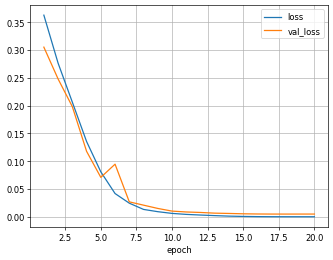

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['loss','val_loss'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


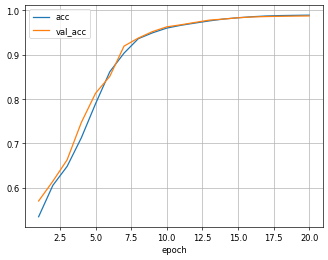

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['acc','val_acc'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


#Probamos con una simulación concreta para inspeccionarla.

In [ ]:

from sklearn.metrics import confusion_matrix

torch.set_printoptions(precision=2)

X_prueba, y_prueba = next(iter(dataloader['val']))
y_prediccion = model(X_prueba)

y_prob = torch.argmax(softmax(y_prediccion), axis=1)
y_prob[1]


tensor([[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
         0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0

In [ ]:

confusion_matrix(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())


array([[656,  19],
       [  0, 109]])

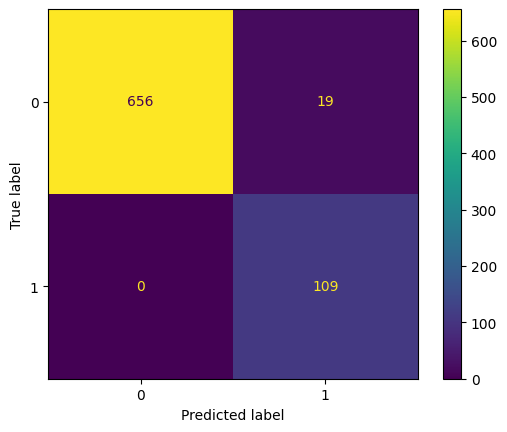

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

# Agente emocional         --> código: 0
# Agente mutante (traidor) --> código: 1
# --------------------------------------
ConfusionMatrixDisplay.from_predictions(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())


#Ahora probamos con todos los datos de VALIDACIÓN.

In [ ]:

from functools import reduce

predicciones  = []
observaciones = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['val']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones.append(list(y_prob.numpy().flatten()))
  observaciones.append(list(y_b.numpy().flatten()))

data_pred = reduce(lambda a, b: a+b, predicciones)
data_obs  = reduce(lambda a, b: a+b, observaciones)

confusion_matrix(data_obs, data_pred)



array([[525073,   7616],
       [   154,  94357]])

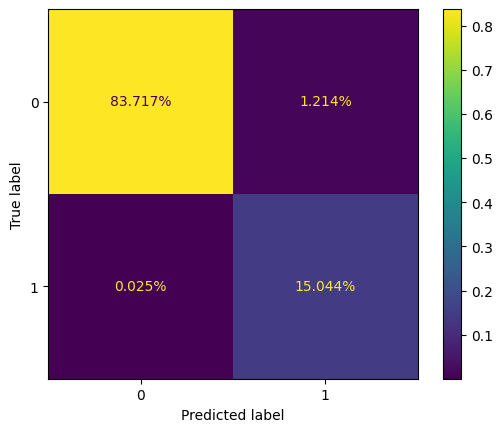

In [ ]:

ConfusionMatrixDisplay.from_predictions(data_obs, data_pred, normalize='all', values_format='.3%')


#Inspeccionamos más detenidamente el tipo de fallos que ocurren en una animación concreta.

In [ ]:

from sklearn.metrics import confusion_matrix

torch.set_printoptions(precision=2)

X_obs, y_obs = next(iter(dataloader['val']))
y_probab = model(X_obs)
y_predic = torch.argmax(softmax(y_probab), axis=1)

# Utilizamos códigos para representar los colores y así identificar
# mejor a los agentes en la predicción (agentes MUTANTES)
red    = '\033[91m'
green  = '\033[92m'
black  = '\x1b[0m'

frame  = 1
cadena = ''
size_m = 3

for i in range(size):
  for j in range(size):
    if (y_predic[frame,i,j] != y_obs[frame,i,j]) and (y_predic[frame,i,j] == 1):
      cadena += red + str(y_predic[frame,i,j].numpy()) + black + '  '
    elif (y_predic[frame,i,j] != y_obs[frame,i,j]) and (y_predic[frame,i,j] == 0):
      cadena += red + '.' + black + '  '
    elif (y_predic[frame,i,j] == y_obs[frame,i,j]) and (y_predic[frame,i,j] == 1):
      cadena += green + str(y_predic[frame,i,j].numpy()) + black + '  '
    else:
      cadena += str(y_predic[frame,i,j].numpy()) + '  '
  cadena += '\n'

print(cadena)



0  0  1  0  0  1  0  0  1  0  0  0  0  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  
1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  
0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  
0  0  0  0  0  1  0  0  0  0  1  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  
0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  1  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  
0  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  
0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0  1  0  0  1  0  0  1  0  0  
0  0  1  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0 

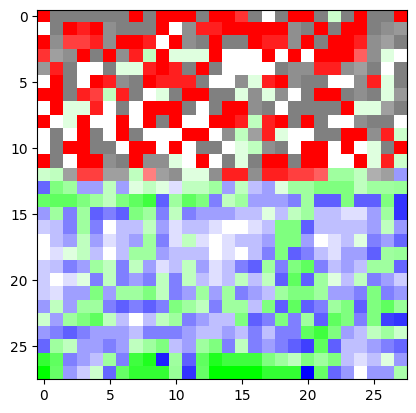

In [ ]:

import matplotlib.pyplot as plt

# Uno de los frames
# -----------------
plt.imshow(X_obs[1].permute(1,2,0))
plt.show()


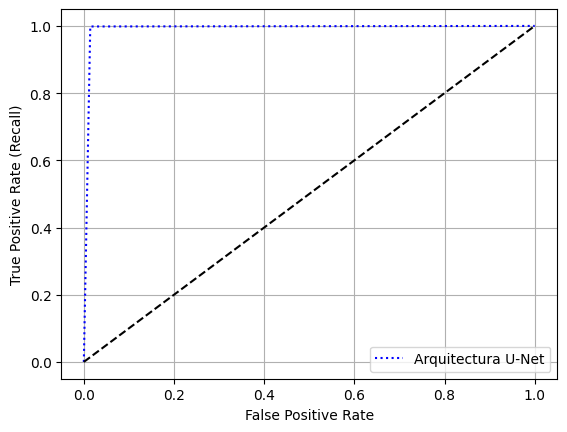

In [ ]:

from sklearn.metrics import roc_curve

# CURVA ROC  (Creo que son 'scores' lo que se le debe pasar
# como segundo argumento. No sé si se puede hacer así)
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(data_obs, data_pred)
plt.plot(fpr, tpr, 'b:', label='Arquitectura U-Net')
plt.plot([0, 1], [0, 1], 'k--')
#plt.axis([0, 1, 0, 1])     # Libro de Aurelien Geron
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()
